<a href="https://colab.research.google.com/github/fran-cielly/Organizador-de-tarefas/blob/main/Organizador_de_Tarefas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📚 📓 Organizador de Tarefas : 
### Com esse programa, temos o objetivo de ajudar os estudantes a organizar melhor sua vida acadêmica na UFABC, por meio de um planejamento mais proveitoso e eficiente.


### 🗃️ Antes de tudo, vamos conectar o programa com a pasta no drive


In [ ]:
#@title ⬅️ Aperte aqui para permitir acesso ao drive
#@markdown 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **❗️ Lembre-se:**

In [ ]:
#@title **⬅️ Aperte aqui para executar a célula**
#@markdown **Uma observação importante é sempre
#@markdown executar essa célula antes de utilizar o programa,
#@markdown para que os dados armazenados possam ser resgatados! 
#@markdown 😉**
import pandas as pd

#resgatando os dados armazenados
tb_disciplina = "/content/drive/MyDrive/Projeto/disciplina.csv"  
tb_tarefa = "/content/drive/MyDrive/Projeto/tarefa.csv" 

dfd = pd.read_csv(tb_disciplina)
dft = pd.read_csv(tb_tarefa)

dft_ordem = dft.sort_values(by=['data', 'complexidade'])
dfd_ordenados = dfd.sort_values(by ='nome')
dft_ordemNF = dft_ordem
df_disEatv = dft_ordem.sort_values(by=['data','complexidade']).groupby(['disciplina','nome', 'data']).sum()
dft_somahorX = dft_ordem.groupby('disciplina').sum()

###  📂 Primeiro, cadastre suas disciplinas. 

In [ ]:
#@title Cadastrar uma disciplina { vertical-output: true, display-mode: "both" }

#Cadastrar disciplinas na tabela
import pandas as pd 

#entradas
nome = "BCC" #@param {type:"string"}
T = 0 #@param {type:"slider", min:0, max:10, step:1}
P = 2 #@param {type:"slider", min:0, max:10, step:1}
I = 2 #@param {type:"slider", min:0, max:10, step:1}


tb_disciplina = "/content/drive/MyDrive/Projeto/disciplina.csv"  
dfd = pd.read_csv(tb_disciplina)
disciplinas = dfd["nome"].values

#verificando se já foi cadastrada uma disciplina com esse nome
if any(nome in n for n in disciplinas):
  print("Já existe uma disciplina cadastrada com esse nome")

else:
  #Salvando na tabela disciplina.csv

  df = pd.DataFrame({'nome':[nome],'T':[T],'P':[P],'I':[I]})
  df.to_csv (tb_disciplina,  mode='a', index = False, header=False)

  print("Disciplina cadastrada com sucesso!")



Já existe uma disciplina cadastrada com esse nome


###  🗃️ Execute a célula para ver as disciplinas cadastradas e suas respectivas TPI

In [ ]:
#Visualizar disciplinas cadastradas
import pandas as pd

tb_disciplina = "/content/drive/MyDrive/Projeto/disciplina.csv"
dfd = pd.read_csv(tb_disciplina) 

#ordenando em ordem alfabética
dfd_ordenados = dfd.sort_values(by ='nome')
display(dfd_ordenados)

,nome,T,P,I
0,BCC,2,4,2
3,BCE,3,0,4
4,BM,3,1,4
1,EDTV,4,0,2
2,EM,3,0,4


###  📁 Agora, cadastre todas as suas tarefas

In [ ]:
#@title Cadastrar uma tarefa { vertical-output: true, display-mode: "both" }

#Cadastro das tarefas na tabela
import pandas as pd
tb_disciplina = "/content/drive/MyDrive/Projeto/disciplina.csv" 
tb_tarefa = "/content/drive/MyDrive/Projeto/tarefa.csv" 
tb_horas = "/content/drive/MyDrive/Projeto/horas_semanais.csv" 

#Buscando e mostrando o nome das disciplinas cadastradas

#listando disciplinas cadastradas
dfd = pd.read_csv(tb_disciplina)
disciplinas = dfd["nome"].values
print("Disciplinas cadastradas: ", disciplinas, "\n")

#entradas
disciplina = "BCC" #@param {type:"string"}
nome = "prova" #@param {type:"string"}
complexidade = "3 - cerca de 1:30h" #@param ["1 - cerca de 30min", "2 - cerca de 1h", "3 - cerca de 1:30h", "4 - cerca de 2h", "5 - cerca de 2:30h", "6 - cerca de 3h", "7 - cerca de 4h"]
data = "2020-12-14" #@param {type:"date"}

#convertendo complexidade de string para int
complexidade = int(complexidade[0])

#atribuindo a hora de acordo com a complexidade

if (complexidade == 1):
  hora = 0.5
elif (complexidade == 2):
  hora = 1.5
elif (complexidade == 3):
  hora = 2
elif (complexidade == 4):
  hora = 2.5
elif (complexidade == 5):
  hora = 3
else:
  hora = 4

#verificando se todos os campos foram preenchidos
if ((not disciplina) or (not nome) or (not data) or (not complexidade) or (not data)):
  print("Preencha todos os campos para cadastrar uma tarefa")

#verificando se nome não está vazia e se aquela disciplina está cadastrada
elif any(disciplina in n for n in disciplinas):

  #salvando na tarefa.csv
  df = pd.DataFrame({'disciplina':[disciplina], 'nome':[nome], 'data': [data], 'complexidade':[complexidade], 'hora':[hora]})
  df.to_csv (tb_tarefa,  mode='a', index = False, header=False)

  print("\nTarefa cadastrada com sucesso!")

else:
  print("\nEssa disciplina não está cadastrada")



Disciplinas cadastradas:  ['BCC' 'EDTV' 'EM' 'BCE' 'BM'] 


Tarefa cadastrada com sucesso!


### Aqui está a lista com todas as tarefas que se deve fazer, já organizado para você! Elas estarão todas listadas e já dispostas em uma ordem, tendo como prioridade a data de entrega e também a complexidade. 
###Essa ordem é uma sugestão a qual acredita-se ser o planejamento mais eficaz para o estudante. 

### Além disso, você pode ver essa lista de várias formas diferentes! É só marcar uma ou várias opções abaixo para poder visualizá-la por meio dos filtros.

In [ ]:
#@title   📄  Consulte a lista por meio de filtros: { vertical-output: true }

Lista_completa_todas_tarefas = False #@param {type:"boolean"}
Tarefas_nao_Feitas =False #@param {type:"boolean"}
Tarefas_por_disciplina = False #@param {type:"boolean"}
Total_horas_por_disciplinas = True #@param {type:"boolean"}

import pandas as pd
tb_disciplina = "/content/drive/MyDrive/Projeto/disciplina.csv" 
tb_tarefa = "/content/drive/MyDrive/Projeto/tarefa.csv" 

dfd = pd.read_csv(tb_disciplina) 
dft = pd.read_csv(tb_tarefa)
dft_ordem = dft.sort_values(by=['data', 'complexidade'])

if Lista_completa_todas_tarefas == True:
  print('\033[1m Lista com todas as tarefas na ordem sugerida para realização: \033[0m')
  try: 
    display(dft_ordemR.fillna('----'))
    print('\n')
  except:
    display(dft_ordem.fillna('----'))
    print('\n')

if Tarefas_nao_Feitas == True:
  try: 
    dft_ordemNF = dft_ordem
  except:
    dft_ordemNF = dft_ordemR
  tnf = dft_ordemNF['Horas Reais'].isnull().count()

  for n in range(len(dft_ordemNF)):
    if dft_ordem.loc[n,'Horas Reais'] > 0:
      dft_ordemNF = dft_ordemNF.drop(n)
  print('\033[1m Lista com as tarefas que ainda precisam ser feitas: \033[0m')
  
  if tnf > 1 :
    print('✏️ Ainda faltam', tnf,'tarefas para serem concluídas.')

  elif tnf == 1:
    print('✏️ Ainda falta', tnf,'tarefa para ser concluída.')
    
  elif tnf == 0:
    print('Todas as tarefas foram concluídas!😃')
    
  display(dft_ordemNF.fillna('----'))
  print('\n')

if Tarefas_por_disciplina == True:
  print('\033[1m Todas as tarefas de cada disciplina: \033[0m')
  try:
    df_disEatv = dft_ordemR.sort_values(by=['data','complexidade']).groupby(['disciplina','nome', 'data']).sum()
    display(df_disEatv)
  except:
    df_disEatv = dft_ordem.sort_values(by=['data','complexidade']).groupby(['disciplina','nome', 'data']).sum()
    display(df_disEatv)
  print('\n')

if Total_horas_por_disciplinas == True:
  print('\033[1m Total da soma das horas estimadas e horas gatas de cada disciplina:  \033[0m')
  try: 
    dft_somahorX = dft_ordemR.groupby('disciplina').sum()
    display(dft_somahorX)
    print('\n')
  except:
    dft_somahorX = dft_ordem.groupby('disciplina').sum()
    display(dft_somahorX)
    print('\n')
      
if Lista_completa_todas_tarefas == False and Tarefas_por_disciplina == False and Total_horas_por_disciplinas == False and Tarefas_nao_Feitas == False:
  print('Nenhuma opção marcada!\nMarque uma das opções para escolher um filtro')

 Total da soma das horas estimadas e horas gatas de cada disciplina:  


,complexidade,horas,Horas Reais
disciplina,,,
BCC,15,9.5,3.0
BCE,6,4.0,0.0
BM,5,3.0,2.0
EDTV,59,37.0,0.0
EM,3,2.0,0.0


###  📑 Mas se você quiser ser um pouco mais específico, é possível buscar pelo nome da disciplina todas as tarefas e com suas respectivas informações também. Veja!

In [ ]:
#@title Visualizar tarefas por disciplina { vertical-output: true }
disciplina = "BCC" #@param {type:"string"}
#Consulta das tarefas por disciplina

import pandas as pd

tb_tarefa = "/content/drive/MyDrive/Projeto/tarefa.csv" 
tb_disciplina = "/content/drive/MyDrive/Projeto/disciplina.csv" 

#listando disciplinas cadastradas
dfd = pd.read_csv(tb_disciplina)
disciplinas = dfd["nome"].values
#print("Disciplinas cadastradas: ", disciplinas, "\n")

#disciplina = input("Digite a disciplina da qual quer visualizar as tarefas: ")

#verificando se a disciplina está cadastrada
if any(disciplina in n for n in disciplinas):

  dft = pd.read_csv(tb_tarefa)

  #listando tarefas da disciplina digitada e ordenando pela data de entrega mais próxima
  dft_ordem1 = dft.query("disciplina == '{}'".format(disciplina))
  dft_ordem1 = dft_ordem1.sort_values(by=['data'])
  display(dft_ordem1.fillna('----'))

  #calculando horas totais previstas
  total_horas = dft_ordem1["horas"].sum()
  print("\nTotal de horas calculadas para ",disciplina," previstas: ",total_horas)

else:
  print("Disciplina não cadastrada")

,disciplina,nome,data,complexidade,horas,Feito,Horas Reais
5,BCC,atividade,2020-11-30,4,2.5,✅,3
6,BCC,atividade,2020-11-30,4,2.5,✅,----
7,BCC,atividade,2020-11-30,4,2.5,----,----
21,BCC,prova,2020-12-14,3,2.0,----,----



Total de horas calculadas para  BCC  previstas:  9.5


### ⏰ Após a realizações das tarefas na semana, registre as horas que você realmente gastou para a realização de cada tarefa. 

In [ ]:
#Cadastro de horas de cada disciplina em cada semana
import pandas as pd

tb_disciplina = "/content/drive/MyDrive/Projeto/disciplina.csv" 
tb_horas = "/content/drive/MyDrive/Projeto/horas_semanais.csv" 
tb_tarefa = "/content/drive/MyDrive/Projeto/tarefa.csv" 
 
dfd = pd.read_csv(tb_disciplina)
dft = pd.read_csv(tb_tarefa)

#listando disciplinas cadastradas
dfd = pd.read_csv(tb_disciplina)
disciplinas = dfd["nome"].values
print("Disciplinas cadastradas: ", disciplinas, "\n")

#lendo a disciplina
disciplina = input("Digite a disciplina da qual quer cadastrar as horas:")
dft_ordemR = dft_ordem

#verificando se a disciplina está cadastrada
if any(disciplina in d for d in disciplinas):

  print(disciplina)

  #listando as terefas com os index
  chaves = dft_ordem.query("disciplina == '{}'".format(disciplina)).index

  for n in chaves:
    #selecionando a tarefa de acordo com o index
    tarefa = dft_ordem.loc[n]

    #mostrando informações da tarefa
    print("Nome:",tarefa["nome"])
    print("Horas previstas:",tarefa["horas"])

      #vendo se já fez tal tarefa
    print("Se as horas dessa tarefa já foram cadastradas, apenas pressione a tecla 'Enter'.")
    check = input("Essa tarefa já foi realizada? (sim / não): ")
    if check == 'sim':
      #lendo as horas gastas
      horas_gastas = float(input("Digite quantas horas gastou realizando essa tarefa: "))
      
      #salvando na tarefa.csv
      dft_ordem.loc[n, 'Feito'] = '✅'
      dft_ordem.to_csv (tb_tarefa, index = False, header=True)
      dft_ordem.loc[n, 'Horas Reais']= horas_gastas
      print("\nTempo registrado com sucesso!\n")
      print('\n')

    elif check == 'não':
      dft_ordem.loc[n, 'Feito'] = None
      print("Não foi registrado o tempo dessa tarefa.")
      print('\n') 

    #apenas continua a loop, não altera nada
    elif check == '':
      print('\n')
      continue

    #caso aconteça erros de digitação
    else:
      print("Não foi possível cadastrar o tempo dessa tarefa.")
      print('\n')

else:
  print("Disciplina não cadastrada")


display(dft_ordemR.fillna('----'))


Disciplinas cadastradas:  ['BCC' 'EDTV' 'EM' 'BCE' 'BM'] 

Digite a disciplina da qual quer cadastrar as horas:BCC
BCC
Nome: atividade
Horas previstas: 2.5
Se as horas dessa tarefa já foram cadastradas, apenas pressione a tecla 'Enter'.
Essa tarefa já foi realizada? (sim / não): 


Nome: atividade
Horas previstas: 2.5
Se as horas dessa tarefa já foram cadastradas, apenas pressione a tecla 'Enter'.
Essa tarefa já foi realizada? (sim / não): 


Nome: atividade
Horas previstas: 2.5
Se as horas dessa tarefa já foram cadastradas, apenas pressione a tecla 'Enter'.
Essa tarefa já foi realizada? (sim / não): 


Nome: prova
Horas previstas: 2.0
Se as horas dessa tarefa já foram cadastradas, apenas pressione a tecla 'Enter'.
Essa tarefa já foi realizada? (sim / não): 




,disciplina,nome,data,complexidade,horas,Feito,Horas Reais
0,EDTV,auto-avaliacao,2020-11-07,2,1.5,----,----
1,EDTV,ativiade 2,2020-11-07,2,1.5,----,----
2,EM,testes 10,2020-11-07,3,2.0,✅,----
3,BCE,prova final,2020-11-07,6,4.0,----,----
4,EDTV,trabalho - divulgacao cientifica,2020-11-07,7,4.0,----,----
5,BCC,atividade,2020-11-30,4,2.5,✅,3
6,BCC,atividade,2020-11-30,4,2.5,✅,----
7,BCC,atividade,2020-11-30,4,2.5,----,----
8,EDTV,atividade,2020-11-30,4,2.5,----,----
9,EDTV,atividade,2020-11-30,4,2.5,----,----



**⬆️ Agora, se voltar lá em cima, a lista vai ser atualizada e as horas reais e a marcação indicando que essa tarefa já foi concluída ✅ vão estar lá.**

## Relatório Semanal  📊 

No fim da semana, depois de registrar todas as horas reais para a realização de cada tarefas, temos informações suficientes para gerar dois gráficos. 


📊 O **primeiro gráfico** mostrará uma comparação entre o total de horas que foram inicialmente estimadas pelo o programa que o estudante iria gastar em cada disciplina na semana, o total de horas que realmente foram gastos nessa mesma disciplina e mais a sua I(horas de estudos individuais por semana) da TPI.


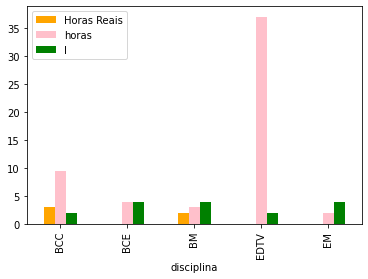

In [ ]:
dft_somahorX = dft_ordemR.groupby('disciplina').sum()
dft_somahorX['I'] = dfd_ordenados['I'].values
dft_somahorX.plot.bar(y=['Horas Reais','horas', 'I'],color=['orange', 'pink', 'green'])

📊 Já o **segundo gráfico**, gera a mesma comparação, mas agora voltado para as tarefas. Desse modo, o histograma mostra as horas estimadas e as horas reais utilizadas para a realização de cada tarefa.

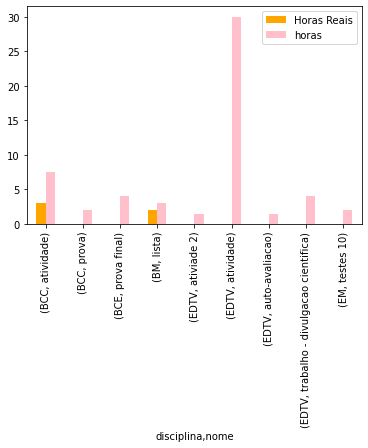

In [ ]:
dft_ordenados = dft_ordemR.sort_values(by ='disciplina')
dft_tar = dft_ordenados.groupby(['disciplina', 'nome']).sum()
dft_tar.plot.bar(y=['Horas Reais','horas'],color=['orange', 'pink'])


⌛️ Dessa forma, fica mais fácil de visualizar o tanto de tempo usado durante essa semana para a dedicação em cada disciplina e para cada tarefa.


Assim, por esse programa, será possível acompanhar sua trajetória acadêmica de uma forma muito mais fácil e eficiente. O tempo que você levaria pensando em como organizar suas tarefas poderá ser economizado para que você use dedicando-se a elas.
Desse modo, tudo que você precisa fazer é entrar no programa e deixar que ele faça esse trabalho a mais para você.

📝 E agora já ficou mais fácil montar um cronograma semanal? 😉